In [1]:
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import pandas as pd
import numpy as np

In [22]:
from sklearn.linear_model import LinearRegression

df = pd.read_csv(r"C:\Users\Jurgen\Desktop\FYP\Shared\News_Twitter_Stock_Reddit_NaN.csv")
# df = df.drop(columns = ["Reddit_Comment"])
# df = df.dropna().reset_index(drop=True)
df = df.fillna(0)
X = df[["News_Senti", "Twitter_Senti", "Reddit_SelfText", "Reddit_Comment"]].to_numpy()#.reshape(-1, 1)
y = df["Stock_Difference"].to_numpy()
df

,Date,News_Senti,Close_USD,Stock_Difference,Twitter_Senti,Reddit_Comment,Reddit_SelfText
0,1/7/2018,0.000000,0.000000,0.000000,0.0000,0.167460,0.352600
1,2/7/2018,0.000000,40.660223,0.007702,0.0000,0.091721,-0.167850
2,3/7/2018,-0.013258,41.472320,0.812097,0.0000,0.195632,0.065820
3,4/7/2018,0.000000,41.380457,-0.091864,0.0000,0.089100,0.192950
4,5/7/2018,0.000000,41.099746,-0.280711,0.0000,0.107269,0.191075
...,...,...,...,...,...,...,...
483,27/10/2019,0.000000,0.000000,0.000000,0.6369,0.000000,0.000000
484,28/10/2019,0.107508,43.848824,0.522953,0.6369,0.000000,0.000000
485,29/10/2019,0.139891,43.751215,-0.097609,0.6729,0.000000,0.000000
486,30/10/2019,0.000000,43.149714,-0.601502,0.9357,0.000000,0.000000


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score


# regr = LinearRegression()
# regr.fit(X_train, y_train)
# y_pred = regr.predict(X_test)

# # The coefficients
# print('Coefficients: \n', regr.coef_)
# # The mean squared error
# print('Mean squared error: %.2f'
#       % mean_squared_error(y_test, y_pred))
# # The coefficient of determination: 1 is perfect prediction
# print('Coefficient of determination: %.2f'
#       % r2_score(y_test, y_pred))
# # The intercept
# print("Intercept: ", regr.intercept_)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

text_classifier = RandomForestRegressor(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
y_pred = text_classifier.predict(X_test)


print("R^2: ", metrics.r2_score(y_test, y_pred))
print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred))
print("Max Error: ", metrics.max_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2:  -0.08756862334770266
Variance Score:  -0.08590281881773265
Max Error:  2.12388371615
Mean Absolute Error: 0.43293328897959815
Mean Squared Error: 0.3868237021411043
Root Mean Squared Error: 0.6219515271635759


In [25]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 0.7867765709661604
RMSE value for k=  2 is: 0.6880411302571868
RMSE value for k=  3 is: 0.6842671912760838
RMSE value for k=  4 is: 0.6516923860401873
RMSE value for k=  5 is: 0.6449854277370106
RMSE value for k=  6 is: 0.6486258170940772
RMSE value for k=  7 is: 0.6368489070762788
RMSE value for k=  8 is: 0.6294905474507766
RMSE value for k=  9 is: 0.6215002058788542
RMSE value for k=  10 is: 0.6190973256074324
RMSE value for k=  11 is: 0.6151798912969584
RMSE value for k=  12 is: 0.6183659911480387
RMSE value for k=  13 is: 0.6133937877071572
RMSE value for k=  14 is: 0.6098477001493736
RMSE value for k=  15 is: 0.6082887620247751
RMSE value for k=  16 is: 0.6089510948937361
RMSE value for k=  17 is: 0.6127085174760024
RMSE value for k=  18 is: 0.6087682970846223
RMSE value for k=  19 is: 0.6081320996179361
RMSE value for k=  20 is: 0.6068768916023913


In [26]:
from sklearn import metrics
from sklearn import neighbors
from math import sqrt




knn = neighbors.KNeighborsRegressor(n_neighbors = 20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print("R^2: ", metrics.r2_score(y_test, y_pred))
print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred))
print("Max Error: ", metrics.max_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
error = sqrt(metrics.mean_squared_error(y_test,y_pred)) #calculate rmse
rmse_val.append(error) #store rmse values

R^2:  -0.03548734198383352
Variance Score:  -0.03270777222830756
Max Error:  2.2328559825000003
Mean Absolute Error: 0.41501708128688525
Mean Squared Error: 0.3682995615609807
Root Mean Squared Error: 0.6068768916023913


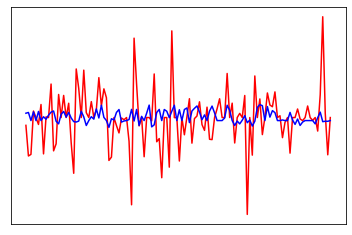

In [27]:
import matplotlib.pyplot as plt

# Plot outputs
# plt.scatter(TwitterSenti, y_test,  color='yellow')
# plt.scatter(TwitterSenti, y_pred, color='blue')
# plt.scatter(NewsSenti, y_pred, color='purple')
# plt.plot(X_test, y_test, color = "blue")
# plt.scatter(X_test, y_pred, color = "yellow")
plt.plot(y_test, color = "red")
plt.plot(y_pred, color = "blue")


plt.xticks(())
plt.yticks(())

plt.show()

# print(X_test.shape, y_test.shape)
# print(X_test.shape, y_pred.shape)

# print(y_pred)



In [ ]:
test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': (y_pred - y_test)})
test

In [ ]:
NewsSenti = []
TwitterSenti = []
for i in range(len(y_test)):
    NewsSenti.append(X_test[i][0])
    TwitterSenti.append(X_test[i][1])
    

# CLASSIFIER

In [ ]:
#Classifier

# df1 = pd.read_csv(r"C:\Users\Jurgen\Desktop\FYP\News\SK-Learn\News_Stock_Data_30.csv")
# X = df1["News_Senti"].to_numpy().reshape(-1, 1)
# y = df1["Stock_Changes"].to_numpy()
# df1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        count += 1
print(count, '/', len(y_test))
print(y_test)
print(y_pred)